# 🔄 Level 3: Training and Evaluation

In this level, you’ll learn how to **train, evaluate, and save models** in PyTorch.  
This is where the magic of deep learning happens—where models learn from data through multiple iterations.

---

## ✔️ Training Loops

A **training loop** is the heart of any deep learning project. It involves:
1. Forward pass → predictions
2. Compute loss
3. Backward pass → gradients
4. Update weights

### Example Training Loop:


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

# Sample model, data, and loss
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Dummy data
X = torch.randn(100, 1)
y = 3 * X + 1

losses=[]
for epoch in range(100):
    optimizer.zero_grad()          # Reset gradients
    y_pred = model(X)              # Forward pass
    loss = criterion(y_pred, y)
    losses.append(loss)# Compute loss
    loss.backward()                # Backward pass
    optimizer.step()               # Update weights


✅ The epoch represents one full pass through the dataset.

## ✔️ Validation/Test
- After training, you need to evaluate your model on unseen data.
- Use model.eval() to switch off training-specific layers (like dropout or batch norm).
- No gradients are needed during evaluation → use torch.no_grad() for efficiency.

In [7]:
model.eval()
with torch.no_grad():
    predictions = model(X)
    val_loss = criterion(predictions, y)


## ✔️ Plotting Metrics
- Tracking metrics (loss, accuracy, etc.) over epochs helps you:
- Detect underfitting/overfitting
- Visualize learning progress

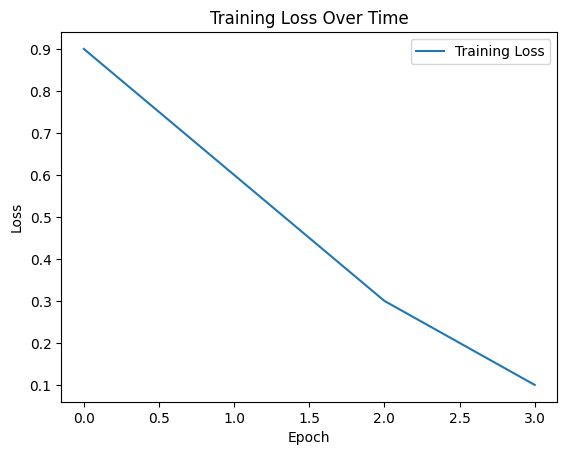

In [22]:
import matplotlib.pyplot as plt

train_losses = [0.9, 0.6, 0.3, 0.1]
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()


✅ You can plot validation metrics the same way.

## ✔️ Saving and Loading Models
- PyTorch allows you to:
- Save only the model weights (state_dict)
- Or the entire model (less common in practice)

In [28]:
#Save model
torch.save(model.state_dict(), 'model.pth')

#Load model
model = nn.Linear(1, 1)  # Must recreate model architecture first
model.load_state_dict(torch.load('model.pth'))
model.eval()



Linear(in_features=1, out_features=1, bias=True)

✅ This is essential for sharing models or resuming training later.

## ✅ Summary Table

| Concept          | PyTorch Example                                        |
|------------------|-------------------------------------------------------|
| Training Loop    | Forward → Loss → Backward → Optimizer Step            |
| Validation/Test  | `model.eval()`, `with torch.no_grad():`               |
| Plotting Metrics | `matplotlib.pyplot.plot()`                            |
| Save/Load Model  | `torch.save()`, `torch.load()`, `model.load_state_dict()` |
